In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
#utility functions

#find "best" local opt and its position
def best_local_opt(particles):
    p = min(particles, key=lambda p : p.local_opt)
    return p.local_opt, p.l_x, p.l_y

#return random number [0,1)
def r(low=0.0, high=1.0):
    return np.random.uniform(low, high, size=1)

In [136]:
class particle:
    def __init__(self, objective_f, lower_bound, upper_bound):
        #position
        self.x = r(lower_bound, upper_bound)
        self.y = r(lower_bound, upper_bound)
        
        #velocity
        self.v_x = r(-abs(upper_bound - lower_bound), abs(upper_bound - lower_bound)) #wiki
        self.v_y = r(-abs(upper_bound - lower_bound), abs(upper_bound - lower_bound))
        
        #local optimum
        self.local_opt = objective_f(self.x, self.y)
        self.l_x = self.x
        self.l_y = self.y

In [170]:
def swarm_particle_optimization(n, a, b, c, objective_f, it, lower_bound, upper_bound):
    g = [] #all global bests
    
    #init step
    particles = np.array([particle(objective_f, lower_bound, upper_bound) for _ in range(n)]) #swarm of particles
    global_opt, g_x, g_y = best_local_opt(particles) # best global optimum and position
    
    #iterative step
    for i in range(it):
        g.append(global_opt)
        for p in particles:
            #update velocity
            p.v_x = (a * p.v_x) + (b * r() * (p.l_x - p.x)) + (c * r() * (g_x - p.x))
            p.v_y = (a * p.v_y) + (b * r() * (p.l_y - p.y)) + (c * r() * (g_y - p.y))

            #update position
            p.x = p.x + p.v_x
            p.y = p.y + p.v_y

            #evaluate local opt
            e = objective_f(p.x, p.y)
            if e < p.local_opt:
                p.local_opt = e
                p.l_x = p.x
                p.l_y = p.y
                
                #evaluate global opt
                if e < global_opt:
                    global_opt = e
                    g_x = p.l_x
                    g_y = p.l_y
    return g, g_x, g_y

[1.] [1.00564275e-06] [-3.9884781e-07]


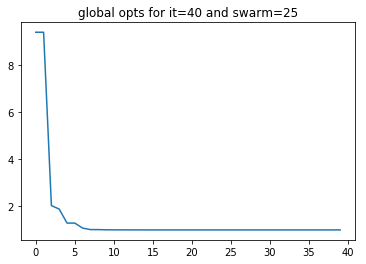

In [172]:
n = 25
a = 0.5
b = 0.8
c = 0.9

it = 40

lower_bound = -10
upper_bound = 10

f = (lambda x,y: x**2 + y**2 + 1) # abs(x + y): min at 0, only if y = -x

g, g_x, g_y = swarm_particle_optimization(n, a, b, c, f, it, lower_bound, upper_bound)

x = np.arange(len(g))
#plt.xticks(np.arange(0, len(x)+1, 1))
plt.plot(x, g)
plt.title("global opts for it="+str(it)+" and swarm="+str(n))
print(g[-1], g_x, g_y)